# Advertising dataset

In [1]:
!gdown --id 1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dSiUf-a7m34gUl3LLPmKDS6-v5sRBUZ0
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 11.1MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(0)

In [3]:
def load_data(filepath = 'advertising.csv'):
    import pandas as pd
    data = pd.read_csv(filepath)
    X = data.drop('Sales', axis = 1)
    y = data['Sales']
    X = np.array(X)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis = 1)
    y = np.array(y)
    return X, y

In [4]:
X, y = load_data()

In [5]:
# Question 2, 3
print('X shape = ', X.shape)
print('y shape = ', y.shape)
print(X[:5,:])


X shape =  (200, 4)
y shape =  (200,)
[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


# GA

## 1. Initialize Population

In [6]:
def create_individual(n=4, bound=10):
    individual =  (np.random.rand(n) - 0.5)* bound
    return individual

In [7]:
individual = create_individual()
print(individual)

[ 1.67562462 -1.64705309 -3.86301627  3.75108203]


In [8]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [9]:
population = initializePopulation(100)
print(len(population))
print(population[:5])

100
[array([ 3.32573117,  1.45677847, -1.0969036 ,  0.02558532]), array([-4.79712655, -3.61200939, -1.21754217,  4.61310288]), array([ 3.83055952, -3.01044249, -0.84079153,  0.04399853]), array([-2.48977133,  4.96100434, -2.14796196, -0.93681437]), array([-1.67795514,  0.33492926,  1.64968104,  2.44119312])]


## 2. Fitness

In [10]:
def compute_loss(individual, X, y):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss  = np.multiply((y_hat-y), (y_hat-y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual, X, y)
    fitness = 1/(loss+1)
    return fitness

In [11]:
# Question 4
X, y = load_data()
individual = [4.09, 4.82, 3.10, 4.02]
fitness = compute_fitness(individual)
print('fitness = ', fitness)

fitness =  1.0185991537088997e-06


## 3. Crossover

In [12]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [13]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


## 4. Mutation

In [14]:
def mutate(individual, mutation_rate = 0.05, bound=10):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = (np.random.rand() - 0.5)* bound
    return individual_m

In [15]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


## 5. Selection

In [37]:
def selection(sorted_old_population, m=100):
    m = len(sorted_old_population)
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

## 6. Create new population

In [58]:
def create_new_population(population, X, y, elitism=2, gen=1, log_step = 1):
    sorted_population = sorted(population, key=compute_fitness)
    m = len(population)
    loss = compute_loss(sorted_population[-1], X, y)
    if gen%log_step== 0:
        print("Best loss:", loss, sorted_population[-1])

    # create new_population
    new_population = sorted_population[-elitism:]

    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population
    return population, loss

In [59]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
X, y = load_data()
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, X = X, y = y, elitism=2, gen=1)

Best loss: 123415.05152880498 [3.44, 2.57, -0.79, -2.41]


## GA

In [69]:
def run_GA():
    X, y = load_data()
    n = 4 # size of individual
    m = 600 # size of popualtion
    n_generation = 1000 # number of generation
    elitism = 2 # number of elitism chromosomes
    losses = []
    population = initializePopulation(m)
    for i in range(n_generation):
        new_population, loss = create_new_population(population, X, y, elitism = elitism, gen=i, log_step=100)
        losses.append(loss)
        population = new_population.copy()
    return population, losses

In [70]:
population, losses = run_GA()

Best loss: 530.3051572469176 [ 2.2101126   0.15445368  0.53175126 -0.98788547]
Best loss: 2.725521742841029 [4.68464374e+00 5.30335608e-02 1.11467829e-01 1.34881083e-03]
Best loss: 2.725346925156038 [4.69903978e+00 5.30335608e-02 1.11467829e-01 1.34881083e-03]
Best loss: 2.713886985239932 [4.75576996e+00 5.34301196e-02 1.06798492e-01 1.34881083e-03]
Best loss: 2.708730124533606 [4.67646566e+00 5.38796925e-02 1.06798492e-01 1.34881083e-03]
Best loss: 2.7086245469585672 [4.68060720e+00 5.38796925e-02 1.06798492e-01 1.18821482e-03]
Best loss: 2.7071532301320556 [4.64235398e+00 5.41175636e-02 1.06798492e-01 1.18821482e-03]
Best loss: 2.7070605079836207 [4.65321733e+00 5.41175636e-02 1.06798492e-01 1.18821482e-03]
Best loss: 2.7070605079836207 [4.65321733e+00 5.41175636e-02 1.06798492e-01 1.18821482e-03]
Best loss: 2.7070595223784757 [4.65144560e+00 5.41175636e-02 1.06798492e-01 1.18821482e-03]


# Visualization

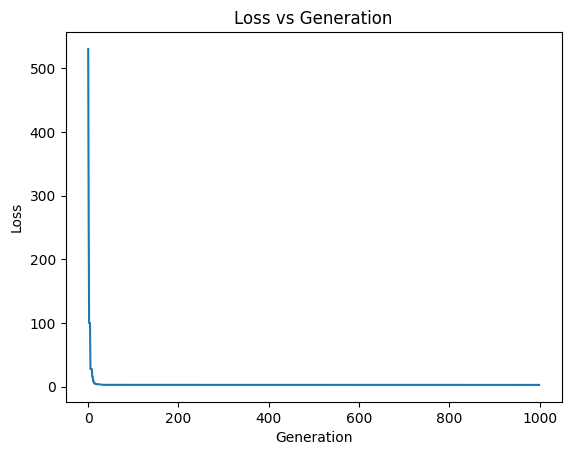

In [71]:
import matplotlib.pyplot as plt

def visualize_loss(losses):
    plt.plot(losses)
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.title('Loss vs Generation')
    plt.show()

visualize_loss(losses)

In [72]:
def visualize_predict_gt(population , X, y):
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])
  estimated_prices = []
  for feature in X:
    y_hat = theta.dot(feature)
    estimated_prices.append(y_hat)
  sales_Y = y
  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()


[4.65144560e+00 5.41175636e-02 1.06798492e-01 1.12634802e-03]


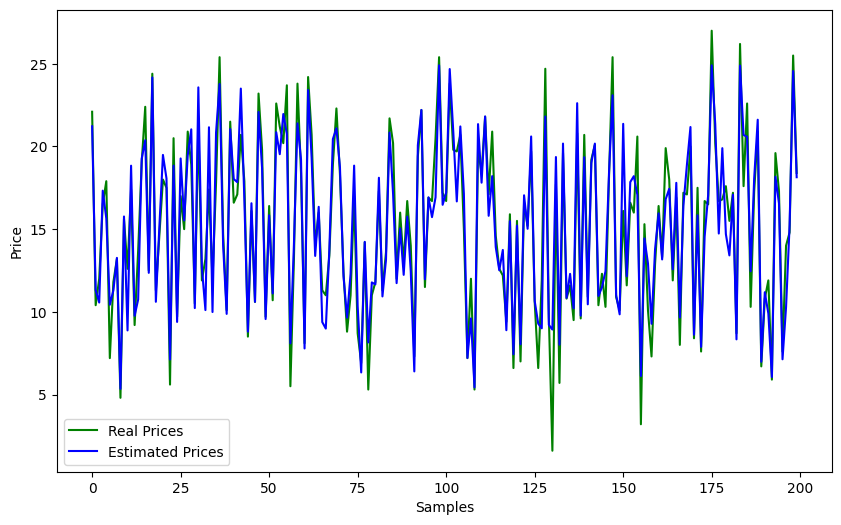

In [73]:
visualize_predict_gt(population, X, y)